In [34]:
# Financial Time Series 
import numpy as np 
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 1000)


"""
Chapter 11 Mathematical Tools 

This introcudes some useful math tools for finance which has evolved into a discipline of applied maths.
"Approximation":
Regression and interpolation are among the most often used numerical techniques in finance.

"Convex Optimazation":
A number of fianacial disciplies need tools for convex optimization 
(for instance, derivatives analytics when it comes to model calibration)

"Integration":
in particular, the valutaion of financial (derivative) assets often boild doen to the evalution of integrals

"Symbolic Computation":
Python provides with SymPy a powerfull package for symbolic mathematics, for example, solving systems of equations

"""
# In this section the example function is the following, which is comprised of a trigonometric term and a linear term:
def f(x):
    return np.sin(x) + 0.5 * x


In [15]:
# Helper function to create the same type of p;ot required multiple times in this chapter:

def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10, 6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

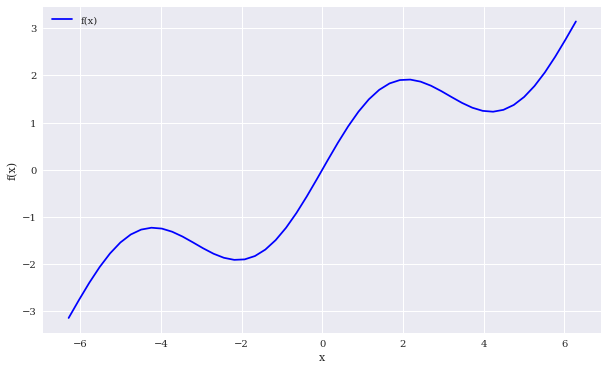

In [16]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50) # The x value used for the plotting and calculation.

create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])

In [ ]:
"""
# Regression 

A rather efficient tool when it comes to function approximation.
Not only suited to approximate one-dimensional functions but also works well in higher dimensions.
Numerical techniques needed to come up with regression results are easily implemented and quickly executed.


# Monomials as basis funtions

One of the simplest cases is to take monomials as basis funtions [b1 = 1, b1 = x, b3 = x*, b4 = x**,....]
NumPy has built-in functions for both the determination of the optimal parameters (namely, np.polyfit())
and the evalutation of the approximation given a set of input values( namely np.polyval())

"""

In [18]:
"""
Given the ry aray, we can compare the regression result with the original function as presented in next plot.
Linear Regression cannot account for the sin part of the example function:
"""

res = np.polyfit(x, f(x), deg=1, full=True) # Linear regression step

res # Full results: regresson parameters, residuals, effictive rank, singular values, and relative condition number.

(array([ 4.28841952e-01, -5.10280049e-17]),
 array([21.03238686]),
 2,
 array([1., 1.]),
 1.1102230246251565e-14)

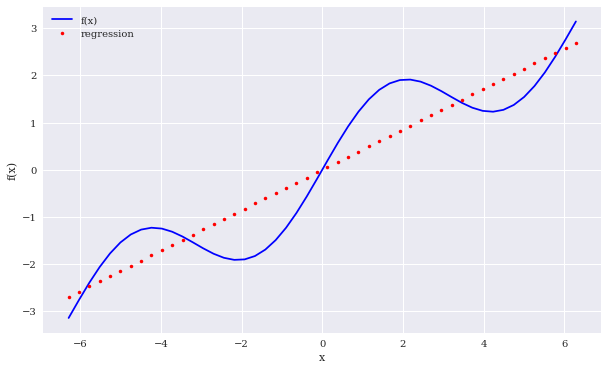

In [22]:
ry = np.polyval(res[0], x) # Evalutaion using the regression parameters 

create_plot([x, x], [f(x), ry], ['b', 'r.'],
           ['f(x)', 'regression'], ['x', 'f(x)'])

In [23]:
"""
To account for tthe sin part of the example function, higher-order monomials are necessary. 
The regression attempt takes monomials up to the order of 5 as basis functions.
"""

reg = np.polyfit(x, f(x), deg=5)
ri = np.polyval(reg, x)

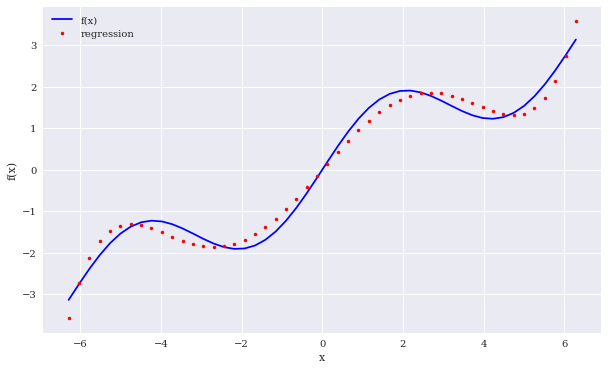

In [25]:
create_plot([x, x], [f(x), ri], ['b', 'r.'],
           ['f(x)', 'regression'], ['x', 'f(x)'])

In [28]:
# Last attempt takes monomials to order 7 to approximate the example fucntion.

regu = np.polyfit(x, f(x), 7)
rie = np.polyval(regu, x)


In [30]:
np.allclose(f(x), rie) # Checks whether the fucntion and regression values are the same (or atlest close)

False

In [31]:
np.mean((f(x) - rie) ** 2) # Calculates the Mean Squared Error (MSE) for the regression values given the function values.

0.001776913475951788

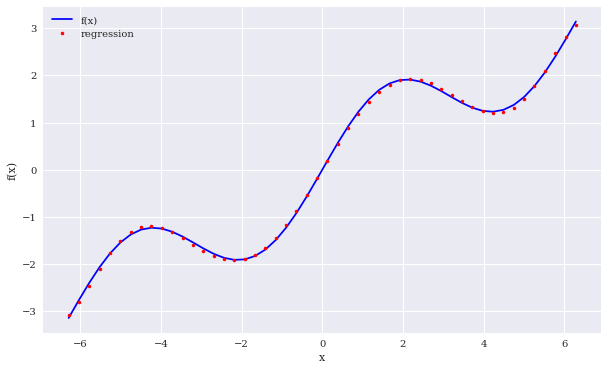

In [32]:
create_plot([x,x], [f(x), rie], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])

In [33]:
"""
Induvidual basis functions.

In general, one can reach better regression results by chossing better sets of basis functions.
By exploiting knowledge about the functions to approzimate.
In this case, individuall basis functions have been defined via a matrix approach.
"""

matrix = np.zeros((3 + 1, len(x))) # The ndarray object of the basis function values (matrix)
matrix[3, :] = x ** 3 # The basis function values from constant to cubic.
matrix[2,:] = x ** 2
matrix[1,:] = x
matrix[0, :] = 1


reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0] # The regression step

In [35]:
reg.round(4) # Optimal regression parameters 

array([ 0.    ,  0.5628, -0.    , -0.0054])

In [36]:
rhyie = np.dot(reg, matrix) # 

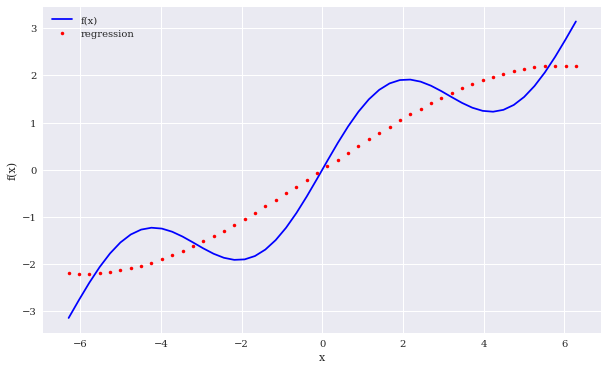

In [38]:
create_plot([x,x], [f(x), rhyie], ['b', 'r.'],
           ['f(x)', 'regression'], ['x', 'f(x)'])

In [39]:
"""
# Noisy data 

Regression can cope equally well with noisy data, be it data from simulation or from (nonperfect) measurements.
To illustrate this point, independent observations with noise and dependent observations with noise are ganareted.
In a sense, the regression averages out the noise tot some extent:
"""

xn = np.linspace(-2 * np.pi, 2 * np.pi, 50) #

xn = xn + 0.15 * np.random.standard_normal(len(xn)) # 

yn = f(xn) + 0.25 * np.random.standard_normal(len(xn)) #

In [ ]:
reg = np.polyfit(xn, yn, 7)
ei = np.polyval(reg, xn)


create_plot([x,x], [f(x), ei], ['b', 'r.'],
           ['f(x)', 'regression'], ['x', 'f(x)'])

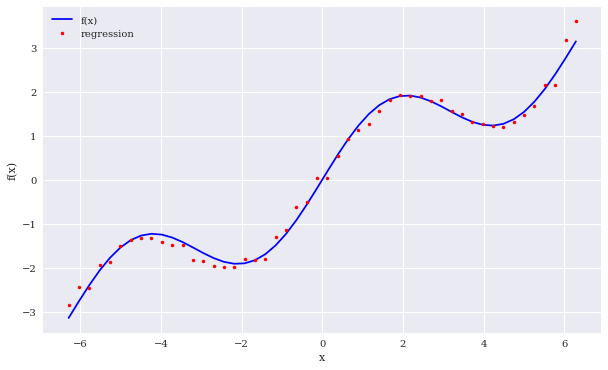

In [41]:
# An important aspect of regression is that the approach also works seamlessly with unsorted data.(example skipped)

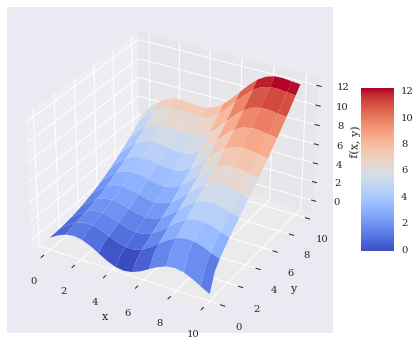

In [47]:
"""
# Multiple dimensions 

A charactersistic of the least-sqaures regression, it carries over to multiple dimensions.
"""


def fm(p):
    x, y = p
    return np.sin(x) + 0.25 * x * + np.sqrt(y) + 0.05 * y ** 2

# To propesrly vasulaize this function, grids (in two dimensions) of independent data points are needed.


x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y) # Genarates 2d array objects('grids') out of the 1D ndarray objects.

Z = fm((X, Y))
x = X.flatten() # Yileds 1D ndarrray objects form the 2d array objects.
y = Y.flatten()

from mpl_toolkits.mplot3d import Axes3D # Imports the 3d plotting capabilities from matplotlib as required.

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                      cmap='coolwarm', linewidth=0.5,
                      antialiased=True)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)



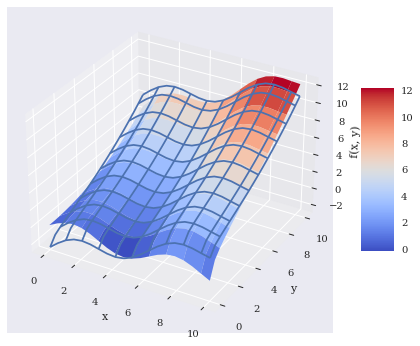

In [54]:
mtx = np.zeros((len(x), 6 + 1))
mtx[:, 6] = np.sqrt(y) # The np.sqrt() function for the y parameter 
mtx[:, 5] = np.sin(x) # The np.sin() function for the x parameter
mtx[:, 4] = y ** 2
mtx[:, 3] = x ** 2
mtx[:, 2] = y
mtx[:, 1] = x
mtx[:, 0] = 1


reg = np.linalg.lstsq(mtx, fm((x, y)), rcond=None)[0]

RZ = np.dot(mtx, reg).reshape((20, 20)) # Transforms the regression resluts to the grid stucture

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                      cmap='coolwarm', linewidth=0.5,
                      antialiased=True) # Plots the original function surface
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2,
                         label='Regrssion') # Plots regression surface.




ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)



In [ ]:
"""
# Regression 

Least-squares regression approaches have multiple areas of application including:
simple function approximation and function approximation based of noisy or unsorted data.
These approaches can be applied to one_dimensional as well as multidimansional problems.
"""

In [ ]:
# Interpolation 

"""
In the cases where spline interpolation can be applied, one can expect better approximation relusts
compared to a least-square regression approach.
Sorted and non-noisy data is required adna approach is limited to low dimensional problems.
"""

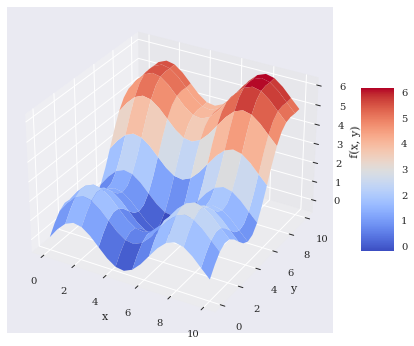

In [59]:
# Convex Optimization 

"""
In finanace and economics, convex optimization plays important roles.
Examples are calibration of option pricing models to market data ot the optimization of an agent's utility function.
"""

def unti_f(p):
    x, y = p
    return(np.sin(x) + 0.05 * x * 2
        + np.sin(y) + 0.05 * y ** 2)

"""
The next plot shows the fucntion graphically for the defined intervals for x and y.
Visual inspacetion already reveals that this fuction has multiple local minima.
Existence of a gloabl minimum cannot really be confirmed by this plot but seems to exist.
"""

x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y) # Genarates 2d array objects('grids') out of the 1D ndarray objects.

Z = unti_f((X, Y))

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                      cmap='coolwarm', linewidth=0.5,
                      antialiased=True)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [8]:
# Gloabl Optimization 
"""
What follows a global minimization approach and a local one are implemented.
The fucntions sco.brute() and sco.fmin() that are applied are from scipy.optimize 

For a closer look behind the scenes during minimization procedures.
The following code amends the original function by an option to output current parameter values as well as the fuction values.
This allows us to keep track of all relevant inforamation for the procedure:
"""

import scipy.optimize as sco 
import numpy as np

def fo(p):
    x, y = p
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print('%8.4f | %8.4f | %8.4f' % (x, y, z)) # The inforamtion to print out if output = True
    return z

In [9]:
output = True
sco.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)
# The optimal parameter values given initial parameterization of the fucntion are x = y = 0

-10.0000 | -10.0000 |  11.0880
-10.0000 |  -5.0000 |   7.7529
-10.0000 |   0.0000 |   5.5440
-10.0000 |   5.0000 |   5.8351
-10.0000 |  10.0000 |  10.0000
 -5.0000 | -10.0000 |   7.7529
 -5.0000 |  -5.0000 |   4.4178
 -5.0000 |   0.0000 |   2.2089
 -5.0000 |   5.0000 |   2.5000
 -5.0000 |  10.0000 |   6.6649
  0.0000 | -10.0000 |   5.5440
  0.0000 |  -5.0000 |   2.2089
  0.0000 |   0.0000 |   0.0000
  0.0000 |   5.0000 |   0.2911
  0.0000 |  10.0000 |   4.4560
  5.0000 | -10.0000 |   5.8351
  5.0000 |  -5.0000 |   2.5000
  5.0000 |   0.0000 |   0.2911
  5.0000 |   5.0000 |   0.5822
  5.0000 |  10.0000 |   4.7471
 10.0000 | -10.0000 |  10.0000
 10.0000 |  -5.0000 |   6.6649
 10.0000 |   0.0000 |   4.4560
 10.0000 |   5.0000 |   4.7471
 10.0000 |  10.0000 |   8.9120


array([0., 0.])

In [11]:
"""
One might be inclined to accept this as the global minimum.
The first pareameterization here is quite rough, in that step sizes of 5 for both input parameter are used.
This can be refined leading to better results in this case and showing that the previous solution is not the optimal
"""

output = False
opt1 = sco.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)
opt1

array([-1.4, -1.4])

In [13]:
fo(opt1)
# The optimal parameter values are now x = y = -1.4 and the minimal function value for the global minimization is about -1.7749

-1.7748994599769203

In [15]:
# Local Optimization 
"""
The local convex optimization that follows draws on the results from the global optimization.
The fucntion sco.fmin() takes as input the function to minimize and the starting parameter values.
Optimal parameter values are the input parameter tolerance and function value tolerance,
as well as the maximum number of iterations and function calls.
The local optimization further improves the result.
"""

output = True

opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001,
               maxiter=15, maxfun=20) # Local convex optimization

 -1.4000 |  -1.4000 |  -1.7749
 -1.4700 |  -1.4000 |  -1.7743
 -1.4000 |  -1.4700 |  -1.7743
 -1.3300 |  -1.4700 |  -1.7696
 -1.4350 |  -1.4175 |  -1.7756
 -1.4350 |  -1.3475 |  -1.7722
 -1.4088 |  -1.4394 |  -1.7755
 -1.4438 |  -1.4569 |  -1.7751
 -1.4328 |  -1.4427 |  -1.7756
 -1.4591 |  -1.4208 |  -1.7752
 -1.4213 |  -1.4347 |  -1.7757
 -1.4235 |  -1.4096 |  -1.7755
 -1.4305 |  -1.4344 |  -1.7757
 -1.4168 |  -1.4516 |  -1.7753
 -1.4305 |  -1.4260 |  -1.7757
 -1.4396 |  -1.4257 |  -1.7756
 -1.4259 |  -1.4325 |  -1.7757
 -1.4259 |  -1.4241 |  -1.7757
 -1.4304 |  -1.4177 |  -1.7757
 -1.4270 |  -1.4288 |  -1.7757


In [16]:
opt2

array([-1.42702972, -1.42876755])

In [17]:
fo(opt2)


 -1.4270 |  -1.4288 |  -1.7757


-1.7757246992239009

In [18]:
"""
For many convex optimization problems it is advisable to have a global minimization before the local one.
The reason if that local convex optimization algos can get trapped in a local minimum. 

The following shows that setting the starting parameterization to x = y = 2 gives, for example, a 'minumum' value of above zero
"""

output = False
sco.fmin(fo, (2.0, 2.0), maxiter=250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

In [23]:
# Constrained Optimization 
"""
Large classes of economic or financial optimization problems are constrained by one or multiple constraints. Constraints can formally take on the form of equalities and inequalities
of an (expected utility maximizing) investor who can in



# Expected utility maximization problem
To solve this problem, the scipy.optimize.minimize() function is appropriate.
The func takes as input in addition to the function to be minimized - conditions in the form of the equalities and inequalities (as a list of dict objects) as well as boundaries for the parameters.
"""

import math 

def Eu(p): # The function to be minimized, in order to maximize the expected utility
    s , b = p
    return -(0.5 * math.sqrt(s * 15 + b * 5) +
            0.5 * math.sqrt(s * 5 + b * 12))


cons = ({'type': 'ineq',
        'fun':lambda p: 100 - p[0] * 10 - p[1] * 10}) # The inequality constraint as a dict object

bnds = ((0, 1000), (0, 1000)) # The boundary values for the parameters (chosen to be wide enough)

result = sco.minimize(Eu, [5,5], method='SLSQP', 
                     bounds=bnds, constraints=cons) # The constrained optimization 

In [24]:

# The results object contains all the relevant info. With regard to the minimal function value on nneds to recall to shift the sign back.

result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.02547122, 1.97452878])

In [25]:
result['x'] # The optimal parameter values (i.e, the optimal portfolio)

array([8.02547122, 1.97452878])

In [26]:
-result['fun'] # The negative minimum function value as the optimal solution value

9.700883611487832

In [28]:
np.dot(result['x'], [10, 10]) # The budget constraint is binding all wealth is invested

99.99999999999999

In [30]:
#Integration 
"""
For valutation and option pricing, intergration is an important math tool.
Steeming from the fact that risk-neutral values of derivatives can be expressed in general as the discounted expectaion of their payoff.
under risk neutral or martingale measure.

The expectation in turn is a sum in the discrete case and an intergral in the continuous case.
The sub package scipy.intergrate provides diffrent functions for numerical intergrstion.
"""
import scipy.integrate as sci

def f(x):
    return np.sin(x) + 0.5 * x


Text(7.5, 1.5, '$\\int_a^b f(x)dx$')

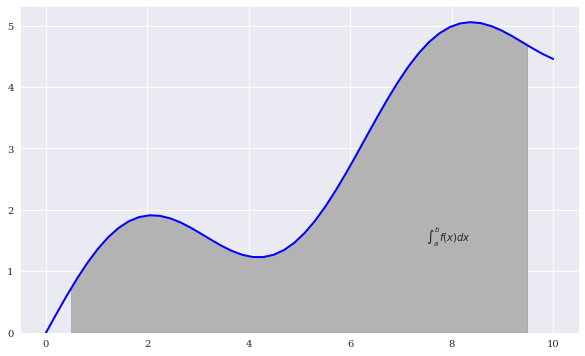

In [36]:
# The integration interval shall be [0.5, 9.5], leading to the definite intergral

# The follwing code defines the major Python objects to evaluate the integral

x = np.linspace(0, 10)
y = f(x)
a = 0.5 # Left integration limit
b = 9.5 # Right integration limit 
Ix = np.linspace(a, b) # Integration interval values
Iy = f(Ix) # Intergration  function value

# The plot visualizes the integral value as the gray-shapded area under the function 

from matplotlib.patches import Polygon

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(bottom=0)
Ix = np.linspace(a, b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$")

In [ ]:
# Numerical Integration 
"""
scipy.integrate subpackage contains a selection of fuctions to numerically integrade a given math function for upper and lower intergration limits.
Examples are [sci.fixed_quad() for fixed Gaussian quadrature], [sci.quad() for adaptive quadrature] and [sci.romberg() for Romberg intergration].
"""



In [37]:
sci.fixed_quad(f, a, b)[0]

24.366995967084602

In [38]:
sci.quad(f, a, b)[0]

24.374754718086752

In [40]:
sci.romberg(f, a, b)

24.374754718086713

In [41]:
"""
There are also a number of intergraion functions that take as input list or ndarray objects eith fucntion values and input values, respectively.
Examples in this regard are sci.trapz(), using the trapezoidal rule, and sci.simps() implementing Simpson's rule:
"""
xi = np.linspace(0.5, 9.5, 25)

sci.trapz(f(xi), xi)

24.352733271544516

In [42]:
sci.simps(f(xi), xi)

24.37496418455075

In [44]:
# Integration by Simulation
"""
Valuaation of options and derivatives by Monte Carlo simulation rests on the insight that one can evalutate an integral by simulation.
Draw I random values of x between the integral limits and evaluate the integration function at every random value for x.
Sum up all the fucntion values and take the ave to arrive at an average function value over the integration interval.
Multiply this value by the length of the integration interval to derive an estimate for the integral value.

This code shows hoe the Monte Carlo estimated integral value converges although not monotonically - to the real one when once increaces the number of random draws.
The estimator is already quite vlose for relatively small number of random draws.
"""

for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i * 10) * (b - a) + a # Number of random x values is increased with every interation.
    print(np.mean(f(x)) * (b  - a))

24.804762279331463
26.522918898332378
26.265547519223976
26.02770339943824
24.99954181440844
23.881810141621663
23.527912274843253
23.507857658961207
23.67236746066989
23.679410416062886
24.424401707879305
24.239005346819056
24.115396924962802
24.424191987566726
23.924933080533783
24.19484212027875
24.117348378249833
24.100690929662274
23.76905109847816


In [61]:
# Symbolic Computation 
# This sec introduces symbolic computation. To this end the SymPy is generally used.

# Basics- SymPy introduces new classes of objects. A fundamental class is the Symbol class

import sympy as sy

x = sy.Symbol('x') # Defines symbols to work with
y = sy.Symbol('y')

type(x)

sympy.core.symbol.Symbol

In [62]:
sy.sqrt(x) # Applies a function on a symbol 

sqrt(x)

In [63]:
3 + sy.sqrt(x) - 4 ** 2 # A numerical expression defined on symbol

sqrt(x) - 13

In [64]:
f = x ** 2 + 3 + 0.5 * x ** 2 + 3 / 2  # A function defined symbolically

In [65]:
sy.simplify(f) # The function expression simplified 

1.5*x**2 + 4.5

In [67]:
"""
This already illustrates a major difference to regular Python code. Although x has no numerical value
the square root of x is nevertheless defined with SymPy since x is a Symbol object.
In the sense, sy.sqrt(x) can be part of arbitrary math expressions.
SymPy in general will simplify given a math expression. 
One can define arbitrary functions using Symbol objects.
They are not to be confused with python functions

SymPy provides three basic renderes for mathematical expressions
* LaTeX-based
* Unicode-based
* ASCII-based
When working in a jupyternotebook [HTML based], LaTex is a visually appeling choice.

The code that follows uses ASCII
"""

sy.init_printing(pretty_print = False, use_unicode=False)

print(sy.pretty(f))

     2      
1.5*x  + 4.5


In [68]:
print(sy.pretty(sy.sqrt(x) + 0.5))

  ___      
\/ x  + 0.5


In [84]:
"""
SymPy also provides many useful math functios.
When it comes to numerically evaluating pie.
The code shows the first and final 40 characters of the string representation of pie up to the 4000000 digit.
It also searches for a six digit ,day-first-birthday.
"""

%time pi_str = str(sy.N(sy.pi, 400000)) # Returns string of the first 4000,000 digits of pie.


Wall time: 130 ms


In [71]:
pi_str[:42] # Shows the first 40 digits

'3.1415926535897932384626433832795028841971'

In [74]:
pi_str[-40:] # Shows the final 40 digits

'8245672736856312185020980470362464176199'

In [83]:
%time jav =  pi_str.find('441893') # Searches for numbers
jav

Wall time: 0 ns


3921

In [86]:
"""
# Equations
A strength of SymPy is looking for solution to the equation obtained by equating the given expression to zero.
"""
sy.solve(x ** 2 - 1)

[-1, 1]

In [87]:
sy.solve(x ** 2 - 1 - 3)

[-2, 2]

In [88]:
sy.solve(x ** 3 + 0.5 * x ** 2 - 1)

[0.858094329496553, -0.679047164748276 - 0.839206763026694*I, -0.679047164748276 + 0.839206763026694*I]

In [89]:
sy.solve(x ** 2 + y ** 2)

[{x: -I*y}, {x: I*y}]

In [98]:
"""
Integration and Differentiaton
Another  strength of SymPy is integration and differentiaion.
The example revisits the function used for numerical and simulation based
integration and derives both a symbolically and numerically exact solution.
Symbol objects for the integration limits objects are required to get started:
"""

a, b = sy.symbols('a b') # The Symbol objects for the integral limits.

I = sy.Integral(sy.sin(x) + 0.5 * x, (x, a, b)) # The Integral object defined and pretty-printed 

print(sy.pretty(I)) # The Integral object defined and pretty-printed 

  b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      


In [94]:
int_func = sy.integrate(sy.sin(x) + 0.5 * x, x) # The antiderivative derived and pretty-printed
print(sy.pretty(int_func)) # The antiderivative derived and pretty-printed

      2         
0.25*x  - cos(x)


In [95]:
Fb = int_func.subs(x, 9.5).evalf() # The values of the antiderivative at tje limits, obtained via the .subs() and evalf().
Fa = int_func.subs(x, 0.5).evalf()

In [96]:
Fb - Fa # The exact numerical value of the integal

24.3747547180867

In [ ]:
"""
# Differantiation 
The derivative of the antiderivative yields in general the original function.
Applying the sy.diff() function to the symbolic antiderivate illustrates this
"""
int_func.diff()

In [100]:
"""
Differantiation will now be used to derive the exact solution of the convex minimization problem this chapter looked at earlier.
The respective function is defined symbolically, partiall derivaties are derived and roots identified.

A necessart but not sufficint condition for global minimum is that both partial derivatives are zero.
Provinding educated giesses based on the global and local minimization efforts from before.
"""

f = (sy.sin(x) + 0.05 * x ** 2
    + sy.sin(y) + 0.05 * y ** 2) # Symbolic version of the function

In [102]:
del_x = sy.diff(f, x) # The two partial derivatives derived and printed 
del_x

0.1*x + cos(x)

In [104]:
xo = sy.nsolve(del_x, -1.5) # Educated guess for the roots and resulting optimal values
xo


-1.42755177876459

In [106]:
yo = sy.nsolve(del_x, 2.5)

In [107]:
f.subs({x : xo, y : yo}).evalf() # The global minium function val

0.249254078704494

In [ ]:
""